In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
import plotly.plotly as py
import plotly.tools as tls

import os
# Input data files are available in the "../input/" directory.
print(os.listdir("../input"))



['yoochoose-data']


In [15]:
# Load Datasets
clicks_df=pd.read_csv('../input/yoochoose-data/yoochoose-clicks.dat',
                      names=['session_id','timestamp','item_id','category'],
                      dtype={'category': str})
display("Clicks Data",)
display(clicks_df.head())

buys_df = pd.read_csv('../input/yoochoose-data/yoochoose-buys.dat', names=['session_id', 'timestamp', 'item_id', 'price', 'quantity'])
display("Buys Data",)
display(buys_df.head())

'Clicks Data'

,session_id,timestamp,item_id,category
0,1,2014-04-07T10:51:09.277Z,214536502,0
1,1,2014-04-07T10:54:09.868Z,214536500,0
2,1,2014-04-07T10:54:46.998Z,214536506,0
3,1,2014-04-07T10:57:00.306Z,214577561,0
4,2,2014-04-07T13:56:37.614Z,214662742,0


'Buys Data'

,session_id,timestamp,item_id,price,quantity
0,420374,2014-04-06T18:44:58.314Z,214537888,12462,1
1,420374,2014-04-06T18:44:58.325Z,214537850,10471,1
2,281626,2014-04-06T09:40:13.032Z,214535653,1883,1
3,420368,2014-04-04T06:13:28.848Z,214530572,6073,1
4,420368,2014-04-04T06:13:28.858Z,214835025,2617,1


In [16]:
# Explore data

# display(clicks_df.describe())
# display(buys_df.describe())
## The results indicate that buys data session_id and item_id are a subset of clicks data


# (clicks_df.groupby(['session_id', 'item_id']).count()).head(10)
## There can be multiple clicks on the same item in a particular session

(buys_df.groupby(['session_id', 'item_id']).count()).head(10)
## There can be multiple buys of the same item in a particular session.
## Notice this is different from quantity bought.
buys_df[buys_df['session_id']==11]



,session_id,timestamp,item_id,price,quantity
10,11,2014-04-03T11:04:11.417Z,214821371,1046,1
11,11,2014-04-03T11:04:18.097Z,214821371,1046,1


In [17]:
# Merge clicks and buys data by session and item ids
# merge by left join bcoz clicks_df's session and item ids are a superset of those of buys_df's
df = pd.merge(clicks_df, buys_df, on=['session_id','item_id'], how='left' , suffixes=('_click','_buy'))
print(len(df), len(clicks_df) + len(buys_df))
df.head()

33234442 34154697


,session_id,timestamp_click,item_id,category,timestamp_buy,price,quantity
0,1,2014-04-07T10:51:09.277Z,214536502,0,NaN,NaN,NaN
1,1,2014-04-07T10:54:09.868Z,214536500,0,NaN,NaN,NaN
2,1,2014-04-07T10:54:46.998Z,214536506,0,NaN,NaN,NaN
3,1,2014-04-07T10:57:00.306Z,214577561,0,NaN,NaN,NaN
4,2,2014-04-07T13:56:37.614Z,214662742,0,NaN,NaN,NaN


In [18]:
display(clicks_df[clicks_df.session_id==420374])

display(buys_df[buys_df.session_id==420374])

display(df[df.session_id==420374])

,session_id,timestamp,item_id,category
1235499,420374,2014-04-06T18:41:46.649Z,214537888,0
1235500,420374,2014-04-06T18:41:50.292Z,214537888,0
1235501,420374,2014-04-06T18:42:33.117Z,214537850,0
1235502,420374,2014-04-06T18:42:38.784Z,214537850,0
1235503,420374,2014-04-06T18:43:02.611Z,214537888,0
1235504,420374,2014-04-06T18:43:10.786Z,214537888,0


,session_id,timestamp,item_id,price,quantity
0,420374,2014-04-06T18:44:58.314Z,214537888,12462,1
1,420374,2014-04-06T18:44:58.325Z,214537850,10471,1


,session_id,timestamp_click,item_id,category,timestamp_buy,price,quantity
1249348,420374,2014-04-06T18:41:46.649Z,214537888,0,2014-04-06T18:44:58.314Z,12462.0,1.0
1249349,420374,2014-04-06T18:41:50.292Z,214537888,0,2014-04-06T18:44:58.314Z,12462.0,1.0
1249350,420374,2014-04-06T18:42:33.117Z,214537850,0,2014-04-06T18:44:58.325Z,10471.0,1.0
1249351,420374,2014-04-06T18:42:38.784Z,214537850,0,2014-04-06T18:44:58.325Z,10471.0,1.0
1249352,420374,2014-04-06T18:43:02.611Z,214537888,0,2014-04-06T18:44:58.314Z,12462.0,1.0
1249353,420374,2014-04-06T18:43:10.786Z,214537888,0,2014-04-06T18:44:58.314Z,12462.0,1.0


In [19]:
clicks_df['timestamp']=pd.to_datetime(clicks_df.timestamp)
clicks_df['hour']=clicks_df.timestamp.dt.hour
clicks_df['weekday']=clicks_df['timestamp'].dt.dayofweek.astype(int)+1

click_hour_info = clicks_df.groupby(['hour'])['session_id'].nunique().reset_index(name='count_h_c')
click_weekday_info = clicks_df.groupby(['weekday'])['session_id'].nunique().reset_index(name='count_w_c')

In [20]:
clicks_df.head()

,session_id,timestamp,item_id,category,hour,weekday
0,1,2014-04-07 10:51:09.277,214536502,0,10,1
1,1,2014-04-07 10:54:09.868,214536500,0,10,1
2,1,2014-04-07 10:54:46.998,214536506,0,10,1
3,1,2014-04-07 10:57:00.306,214577561,0,10,1
4,2,2014-04-07 13:56:37.614,214662742,0,13,1


In [21]:
buys_df['timestamp']=pd.to_datetime(buys_df.timestamp)
buys_df['hour']=buys_df.timestamp.dt.hour
buys_df['weekday']=buys_df['timestamp'].dt.dayofweek.astype(int)+1

buys_hour_info = buys_df.groupby(['hour'])['session_id'].nunique().reset_index(name='count_h_b')
buys_weekday_info = buys_df.groupby(['weekday'])['session_id'].nunique().reset_index(name='count_w_b')

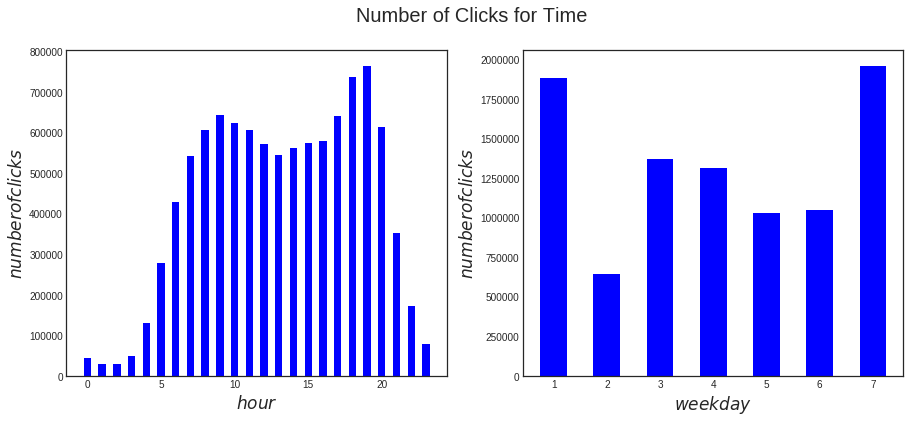

In [28]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Number of Clicks for Time', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#ax1.scatter(click_hour_info['hour'],click_hour_info['count_h_c'],color='b')
#ax1.scatter(buys_hour_info['hour'],buys_hour_info['count'],color='r')
ax1.bar(click_hour_info['hour'],click_hour_info['count_h_c'],width=0.5,color='b')
#ax1.bar(buys_hour_info['hour'],buys_hour_info['count'],width=0.2,color='r')


ax1.set_xlabel('$hour$', fontsize=17)
ax1.set_ylabel('$number of clicks$', fontsize=17)

#ax2.scatter(click_weekday_info['weekday'],click_weekday_info['count_w_c'],color='b')
#ax2.scatter(buys_weekday_info['weekday'],buys_weekday_info['count'],color='r')
ax2.bar(click_weekday_info['weekday'],click_weekday_info['count_w_c'],width=0.5,color='b')
#ax2.bar(buys_weekday_info['weekday'],buys_weekday_info['count'],width=0.03,color='r')

ax2.set_xlabel('$weekday$', fontsize=17)
ax2.set_ylabel('$number of clicks $', fontsize=17)
plt.show()

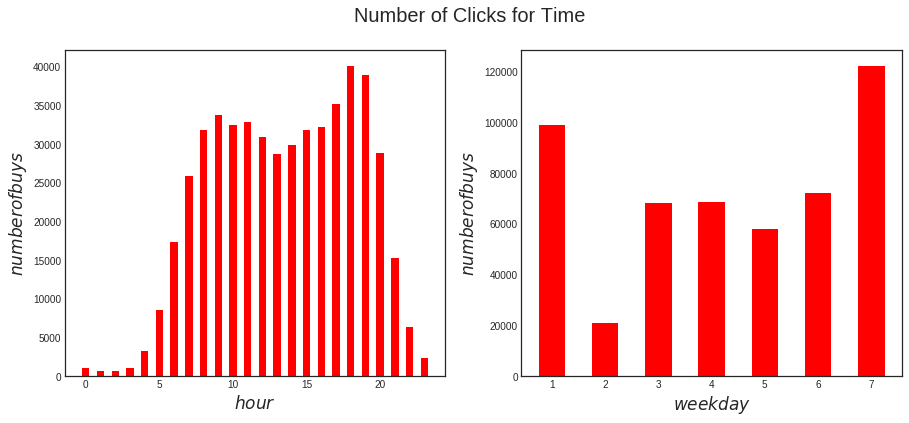

In [31]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Number of Clicks for Time', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#ax1.scatter(click_hour_info['hour'],click_hour_info['count'],color='b')
#ax1.scatter(buys_hour_info['hour'],buys_hour_info['count_h_b'],color='r')
#ax1.bar(click_hour_info['hour'],click_hour_info['count'],width=0.2,color='b')
ax1.bar(buys_hour_info['hour'],buys_hour_info['count_h_b'],width=0.5,color='r')


ax1.set_xlabel('$hour$', fontsize=17)
ax1.set_ylabel('$number of buys$', fontsize=17)

#ax2.scatter(click_weekday_info['weekday'],click_weekday_info['count'],color='b')
#ax2.scatter(buys_weekday_info['weekday'],buys_weekday_info['count_w_b'],color='r')
#ax2.bar(click_weekday_info['weekday'],click_weekday_info['count'],width=0.03,color='b')
ax2.bar(buys_weekday_info['weekday'],buys_weekday_info['count_w_b'],width=0.5,color='r')

ax2.set_xlabel('$weekday$', fontsize=17)
ax2.set_ylabel('$number of buys $', fontsize=17)
plt.show()

In [24]:
# result_hours = pd.merge([click_hour_info,buys_hour_info], join = 'inner')
result_hours = pd.merge(click_hour_info,buys_hour_info,on='hour', how='inner')
# df = pd.merge(clicks_df, buys_df, on=['session_id','item_id'], how='left' , suffixes=('_click','_buy'))

result_hours['ratio'] = result_hours['count_h_b']/result_hours['count_h_c']

#result_weekdays = pd.concat([click_weekday_info,buys_weekday_info], axis = 1, join = 'inner')
result_weekdays = pd.merge(click_weekday_info,buys_weekday_info,on='weekday', how='inner')
result_weekdays['ratio'] = result_weekdays['count_w_b']/result_weekdays['count_w_c']

In [25]:
result_hours.head()
result_weekdays.head()

,weekday,count_w_c,count_w_b,ratio
0,1,1882980,99056,0.052606
1,2,645673,20900,0.032369
2,3,1370040,68324,0.049870
3,4,1316209,68639,0.052149
4,5,1029112,58131,0.056487


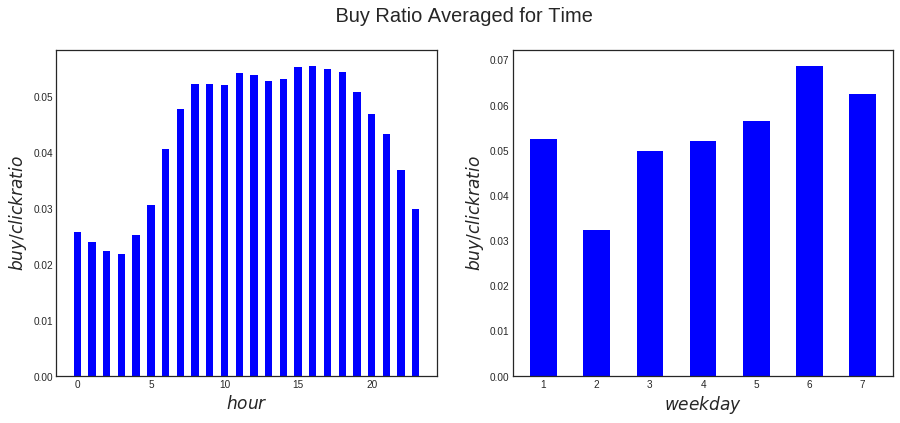

In [30]:
fig = plt.figure(figsize=(15,6))
fig.suptitle(' Buy Ratio Averaged for Time', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#ax1.scatter(result_hours['hour'],result_hours['ratio'],color='b')
ax1.bar(result_hours['hour'],result_hours['ratio'],width=0.5,color='b')


ax1.set_xlabel('$hour$', fontsize=17)
ax1.set_ylabel('$buy/click ratio$', fontsize=17)

#ax2.scatter(result_weekdays['weekday'],result_weekdays['ratio'],color='b')
ax2.bar(result_weekdays['weekday'],result_weekdays['ratio'],width=0.5,color='b')
ax2.set_xlabel('$weekday$', fontsize=17)
ax2.set_ylabel('$buy/click ratio$', fontsize=17)
plt.show()